### Visualize Image Stacking Effect

In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import glob
from PIL import Image
from pylab import figure, cm

import os
import sys  
sys.path.insert(0, '../dip_utils')

from matrix_utils import arr_info
from vis_utils import (vis_rgb_cube,
                       vis_hists,
                       vis_pair)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

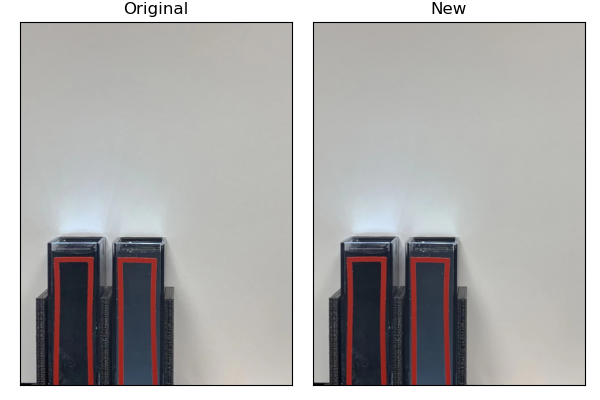

In [2]:
I = plt.imread('../sampled_images/NTU129/NTU129a.jpg')
J = plt.imread('../stacked_new/NTU129.jpg')
vis_pair(I, J)

In [3]:
Ilog = (32*np.log2(I + 1)).astype('uint8')
Jlog = (32*np.log2(J + 1)).astype('uint8')

<ipython-input-3-9743f57fd020>:1: RuntimeWarning: divide by zero encountered in log2
  Ilog = (32*np.log2(I + 1)).astype('uint8')
<ipython-input-3-9743f57fd020>:2: RuntimeWarning: divide by zero encountered in log2
  Jlog = (32*np.log2(J + 1)).astype('uint8')


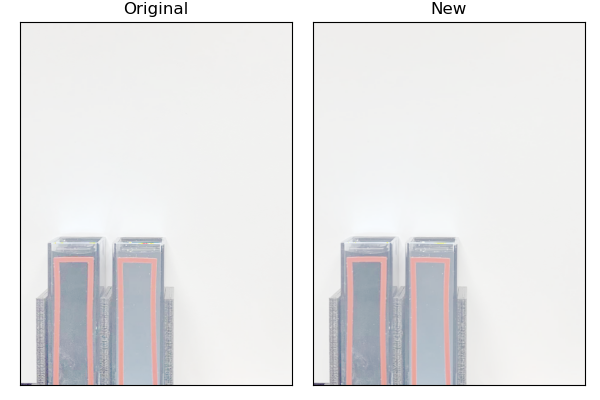

In [4]:
vis_pair(Ilog, Jlog)

In [5]:
plt.savefig('../assets/stacked_log.pdf', dpi=600)

In [6]:
# Some threshold values for visualization
x1 = 195
x2 = 315
y1 = 1543
y2 = 1663

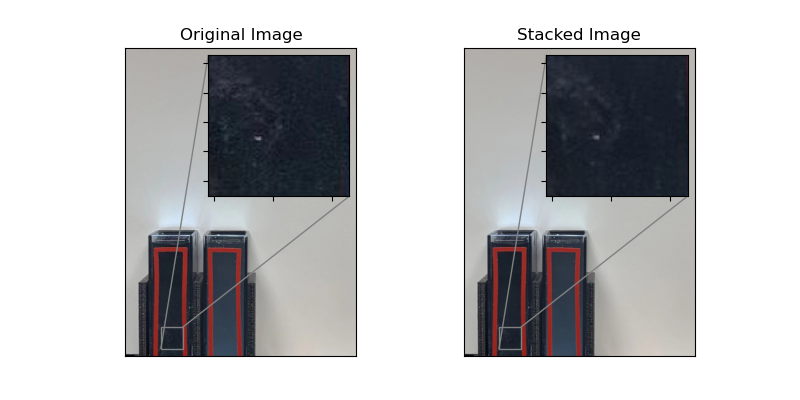

In [7]:
f, ax = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
ax[0].imshow(I)
ax[0].set_title('Original Image')
ax[1].imshow(J)
ax[1].set_title('Stacked Image')
axinsl = zoomed_inset_axes(ax[0], 6.5, loc=1)
axinsl.imshow(I)
axinsl.set_xlim(x1, x2)
axinsl.set_ylim(y2, y1)
mark_inset(ax[0], axinsl, loc1=2, loc2=4, fc="none", ec="0.5")
plt.xticks(visible=False)
plt.yticks(visible=False)
axinsr = zoomed_inset_axes(ax[1], 6.5, loc=1)
axinsr.imshow(J)
axinsr.set_xlim(x1, x2)
axinsr.set_ylim(y2, y1)
mark_inset(ax[1], axinsr, loc1=2, loc2=4, fc="none", ec="0.5")
ax[0].tick_params(
    axis='both',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
ax[1].tick_params(
    axis='both',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
[a.axes.get_xaxis().set_visible(False) for a in ax];
[a.axes.get_yaxis().set_visible(False) for a in ax];
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.draw()
plt.show()

In [8]:
plt.savefig('../assets/stacked.pdf', dpi=600)